In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score as CVS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neural_network import MLPClassifier as ANN

In [2]:
columns = [ # thanks Daniel
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole Weight",
    "Shucked Weight",
    "Viscera Weight",
    "Shell Weight",
    "Rings"
]


data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",names=columns)
data.sample(10)

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
300,F,0.405,0.305,0.095,0.3485,0.1455,0.0895,0.1000,9
2633,I,0.425,0.330,0.115,0.3265,0.1315,0.0770,0.1030,6
1805,M,0.625,0.495,0.175,1.2540,0.5815,0.2860,0.3185,9
3287,M,0.550,0.460,0.130,0.7085,0.3050,0.1455,0.2050,12
1832,I,0.390,0.310,0.105,0.2665,0.1185,0.0525,0.0810,8
2889,I,0.520,0.400,0.110,0.5970,0.2935,0.1155,0.1600,8
3414,F,0.490,0.370,0.105,0.5265,0.2490,0.1005,0.1480,7
214,F,0.485,0.395,0.160,0.6600,0.2475,0.1280,0.2350,14
3290,F,0.510,0.395,0.120,0.6175,0.2620,0.1220,0.1930,12
1317,I,0.555,0.430,0.155,0.7395,0.3135,0.1435,0.2800,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
data.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
# Part (A)

# Convert the column rings into your Y array as follows: if the value is less than
#   or equal to 8, assign to class 0; if the value is equal to 9 or 10, assign to class 1;
#   and otherwise, assign to class 2. There will be three total classes. Generate a Y
#   vector as a numpy array of 0’s, 1’s, and 2’s.  

f = lambda r: 0 if r < 9 else 2 if r > 10 else 1 # thanks Tuan
Y_data = data['Rings'].apply(f)
Y = np.array(Y_data)
Y_data[:10]

0    2
1    0
2    1
3    1
4    0
5    0
6    2
7    2
8    1
9    2
Name: Rings, dtype: int64

In [6]:
#  Part (B): Convet Sex column into 3 binary columns

X = data.drop(columns=["Rings"])
X = pd.get_dummies(X)
print("Shape:",X.shape)
X

Shape: (4177, 10)


,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [7]:
X = np.array(X)
X

array([[0.455, 0.365, 0.095, ..., 0.   , 0.   , 1.   ],
       [0.35 , 0.265, 0.09 , ..., 0.   , 0.   , 1.   ],
       [0.53 , 0.42 , 0.135, ..., 1.   , 0.   , 0.   ],
       ...,
       [0.6  , 0.475, 0.205, ..., 0.   , 0.   , 1.   ],
       [0.625, 0.485, 0.15 , ..., 1.   , 0.   , 0.   ],
       [0.71 , 0.555, 0.195, ..., 0.   , 0.   , 1.   ]])

In [8]:
# Part (C): Convert the data to the highest principal components.

pca = PCA(n_components=5)
pca.fit(X)
X = pca.transform(X)
print("Shape:", X.shape)
X

Shape: (4177, 5)


array([[ 0.02619327, -0.71058533, -0.48658405,  0.0064785 , -0.00799954],
       [-0.22756943, -0.73781423, -0.73117953,  0.03771949,  0.04019116],
       [ 0.12675306,  0.71396346, -0.46547905, -0.04083072, -0.0298925 ],
       ...,
       [ 0.59350394, -0.65020623,  0.06244935,  0.0136522 , -0.01195413],
       [ 0.50235063,  0.75325823, -0.09970724,  0.03770439, -0.05866408],
       [ 1.23688945, -0.58292687,  0.69005653,  0.12212455,  0.03525075]])

In [9]:
# Part (D): Calculate the errors using 10-fold cross validation on KNN and QDA.

# KNN
KNN = KNN(n_neighbors=5)
KNNScores = CVS(KNN, X, Y, cv=10)
print("KNN", np.mean(KNNScores), np.std(KNNScores))

# QDA
QDA = QDA()
QDAScores = CVS(QDA, X, Y, cv=10)
print("QDA", np.mean(QDAScores), np.std(QDAScores))

KNN 0.6339483437173706 0.02319581325423194
QDA 0.619336110059321 0.039309166870116014


In [11]:
# Part (E): Repeat with a neural network

ann = ANN(alpha=1e-5, max_iter=1000, hidden_layer_sizes=(2,3,3), random_state=1)
ANNScores = CVS(ann, X, Y, cv=10)
print("ANN", np.mean(ANNScores), np.std(ANNScores))


ANN 0.6442325565385012 0.033129674350675126


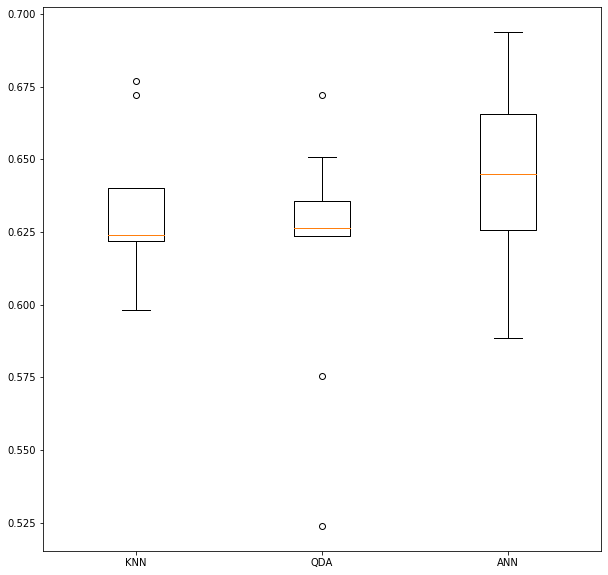

In [14]:
# Part (F) Make a box plot of the resulting scores

plt.boxplot([KNNScores, QDAScores, ANNScores])
plt.xticks([1,2,3], ["KNN","QDA","ANN"])
plt.gcf().set_size_inches(10,10)
plt.show()